# 図(1.13)の導き方
Githubでは数式の部分の表示が上手くいかないようです。私のJupyterLab上では上手く表示されるため、整った形式を見たい方はご自分のPCの環境でご覧ください。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

まずは図(1.12c)を再現できる関数を見つける。
$$
\Phi_2(x, y) = x^2 - y^2 \tag{1.1}
$$
を用いると、$$
\frac{\partial \Phi_1}{\partial x} = u = 2x\\  
\frac{\partial \Phi_1}{\partial y} = v = -2y\\  
\frac{\partial^2 \Phi_1}{\partial x^2} = \frac{\partial u}{\partial x}=2\\  
\frac{\partial^2 \Phi_1}{\partial y^2} = \frac{\partial v}{\partial y}=-2
$$
とすることにより図(1.12c)と似たような図を得ることができる。
$x=\cos \theta, \, y=\sin \theta$とすると式(1.1)は、
$$
\Phi_1 = \cos ^2\theta - \sin ^2 \theta \tag{1.2}
$$
である。これから作成したい図はこれを反時計回りに$45 ^\circ$回転させたものなので、$d_2$を表す$f_2$を求めるために、$\theta \rightarrow \theta + \pi/4, \, \Phi_1 \rightarrow \Phi_2$とすると、
\begin{align}
\Phi_2 &= \cos ^2 \left( \theta + \frac{\pi}{4}\right) - \sin ^2 \left( \theta + \frac{\pi}{4}\right) \\
&= 2\cos\left(2\theta + \frac{\pi}{2}\right)\\
&= 2\sin(2\theta)\\
&= 2\sin\theta\cos\theta\\
&= 2xy
\end{align}
となる。  
![](./identity_cicle.jpeg)  
そして、
\begin{align}
\frac{\partial \Phi_2}{\partial x} &= u =2y\\
\frac{\partial \Phi_2}{\partial y} &= v =2x\\
\frac{\partial}{\partial y}\left(\frac{\partial \Phi_2}{\partial x}\right) &= \frac{\partial u}{\partial y} = 2\\
\frac{\partial}{\partial x}\left(\frac{\partial \Phi_2}{\partial y}\right) &= \frac{\partial v}{\partial x} = 2
\end{align}
とすることにより、作成したい図ができる。

### 補足
$\Phi_1, \,\Phi_2$は速度ポテンシャルというものである。以下[Wikipedia](https://ja.wikipedia.org/wiki/%E9%80%9F%E5%BA%A6%E3%83%9D%E3%83%86%E3%83%B3%E3%82%B7%E3%83%A3%E3%83%AB)より、
> 速度ポテンシャルΦは次式を満たすようなスカラー場である。
> 
>$${\displaystyle {\boldsymbol {u}}=\operatorname {grad} \Phi }$$
ただし、u は流体の速度であり、渦なし、つまり
> 
>$${\displaystyle \operatorname {rot} {\boldsymbol {u}}=\nabla \times {\boldsymbol {u}}={\boldsymbol {0}}}$$
を満たす。これはベクトル解析における
> 
>$${\displaystyle \operatorname {rot} (\operatorname {grad} \Phi )={\boldsymbol {0}}}$$
の性質を用いている（ナブラ#二階微分を参照）。
> 
>一般のポテンシャルと異なり、速度ポテンシャルの定義には負号がつかないことに注意。

$\Phi_1, \,\Phi_2$について調べると、
\begin{align}
{\mathrm{rot}} \left({\mathrm{grad}} \Phi_1\right) &= \frac{\partial u}{\partial y}-\frac{\partial v}{\partial x}\\
&=\frac{\partial}{\partial y}(2x) - \frac{\partial}{\partial x}(2y) \\
&=0-0\\
&=0\\
{\mathrm{rot}} \left({\mathrm{grad}} \Phi_2\right) &=\frac{\partial u}{\partial y}-\frac{\partial v}{\partial x}\\
&=\frac{\partial}{\partial y}(2y) - \frac{\partial}{\partial x}(2x) \\
&=2-2\\
&=0\notag
\end{align}
よって、$\Phi_1, \,\Phi_2$は速度ポテンシャルである。また、渦なし（$\zeta = 0$）でもある。

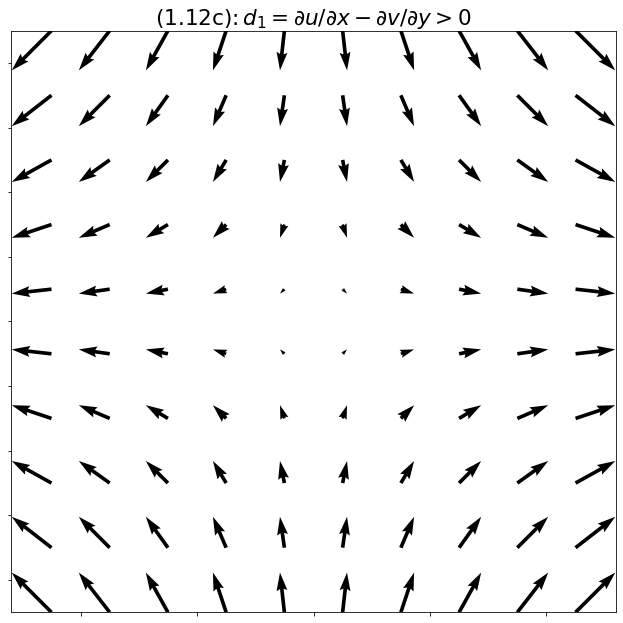

In [2]:
a = np.linspace(-4.5, 4.5, 10)
b = np.linspace(-4.5, 4.5, 10)
aa, bb = np.meshgrid(a, b)
an = len(a)

def df_x(x, y):
    return 2*x

def df_y(x, y):
    return -2*y

ff = np.zeros((len(a), len(b)))
df_x0 = np.zeros((len(a), len(b)))
df_y0 = np.zeros((len(a), len(b)))
for i in range(an):
    for j in range(an):
        df_x0[j, i] = df_x(a[i], b[j])
        df_y0[j, i] = df_y(a[i], b[j])

plt.figure(figsize=(9, 9))
plt.quiver(aa, bb, df_x0, df_y0)
plt.xlim(-5.2, 5.2)
plt.ylim(-4.5, 4.5)
plt.title('(1.12c):$\,d_1=\partial u/\partial x - \partial v/\partial y>0$')
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tight_layout()
plt.savefig('fig_d1.jpg')

plt.show()

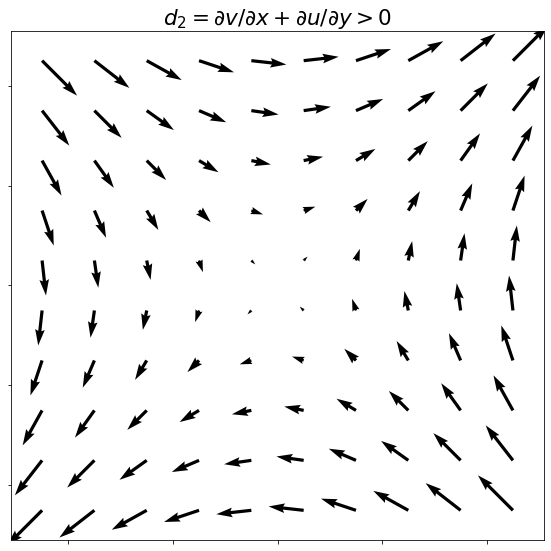

In [3]:
a = np.linspace(-4.5, 4.5, 10)
b = np.linspace(-4.5, 4.5, 10)
aa, bb = np.meshgrid(a, b)
an = len(a)

def df_x(x, y):
    return 2*y

def df_y(x, y):
    return 2*x

ff = np.zeros((len(a), len(b)))
df_x0 = np.zeros((len(a), len(b)))
df_y0 = np.zeros((len(a), len(b)))
for i in range(an):
    for j in range(an):
        df_x0[j, i] = df_x(a[i], b[j])
        df_y0[j, i] = df_y(a[i], b[j])
        
plt.figure(figsize=(8, 8))
plt.quiver(aa, bb, df_x0, df_y0)
plt.xlim(-5.1, 5.1)
plt.ylim(-5.1, 5.1)
plt.title(r'$d_2=\partial v/\partial x + \partial u/\partial y>0$')
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tight_layout()
plt.savefig('fig_d2.jpg')

plt.show()

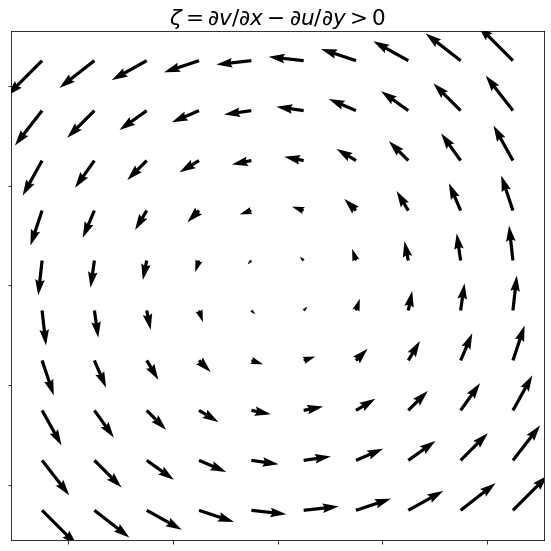

In [4]:
a = np.linspace(-4.5, 4.5, 10)
b = np.linspace(-4.5, 4.5, 10)
aa, bb = np.meshgrid(a, b)
an = len(a)

def df_x(x, y):
    return -2*y

def df_y(x, y):
    return 2*x

ff = np.zeros((len(a), len(b)))
df_x0 = np.zeros((len(a), len(b)))
df_y0 = np.zeros((len(a), len(b)))
for i in range(an):
    for j in range(an):
        df_x0[j, i] = df_x(a[i], b[j])
        df_y0[j, i] = df_y(a[i], b[j])
        
plt.figure(figsize=(8, 8))
plt.quiver(aa, bb, df_x0, df_y0)
plt.xlim(-5.1, 5.1)
plt.ylim(-5.1, 5.1)
plt.title(r'$\zeta=\partial v/\partial x - \partial u/\partial y>0$')
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tight_layout()
plt.savefig('fig_zeta.jpg')

plt.show()

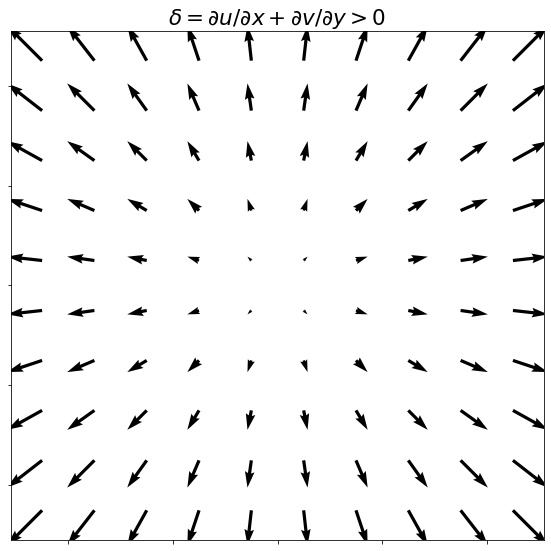

In [5]:
a = np.linspace(-4.5, 4.5, 10)
b = np.linspace(-4.5, 4.5, 10)
aa, bb = np.meshgrid(a, b)
an = len(a)

def df_x(x, y):
    return 2*x

def df_y(x, y):
    return 2*y

ff = np.zeros((len(a), len(b)))
df_x0 = np.zeros((len(a), len(b)))
df_y0 = np.zeros((len(a), len(b)))
for i in range(an):
    for j in range(an):
        df_x0[j, i] = df_x(a[i], b[j])
        df_y0[j, i] = df_y(a[i], b[j])
        
plt.figure(figsize=(8, 8))
plt.quiver(aa, bb, df_x0, df_y0)
plt.xlim(-5.1, 5.1)
plt.ylim(-5.1, 5.1)
plt.title(r'$\delta=\partial u/\partial x + \partial v/\partial y>0$')
plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
plt.tight_layout()
plt.savefig('fig_delta.jpg')

plt.show()